## Generate Synthetic Datasets: Straight Line and Helix

The following function generates two datasets given a number of points:
- A straight line (y = x)
- A helix (x matches the straight line, y and z form a helix)

Both datasets share the same x values.

In [2]:
import numpy as np
import pandas as pd

def generate_line_and_helix(n_points):
    """
    Generate two datasets:
    - Straight line: (x, y) where y = x
    - Helix: (x, y, z) where x matches the line, y = sin(x), z = cos(x)
    Returns:
        line_df: pd.DataFrame with columns ['x', 'y']
        helix_df: pd.DataFrame with columns ['x', 'y', 'z']
    """
    x = np.linspace(0, 4 * np.pi, n_points)
    line_y = x
    helix_y = np.sin(x)
    helix_z = np.cos(x)
    line_df = pd.DataFrame({'x': x, 'y': 0})
    helix_df = pd.DataFrame({'x': x, 'y': helix_y, 'z': helix_z})
    return line_df, helix_df

def generate_line_and_helix_with_noise(n_points, noise_percentage=0.3, noise_scale=0.15):
    """
    Generate two datasets with noise:
    - Straight line: (x, y) where y = x, with noise added to a percentage of points
    - Helix: (x, y, z) where x matches the line, y = sin(x), z = cos(x), with noise added to a percentage of points
    Args:
        n_points: Number of points to generate
        noise_percentage: Fraction of points to add noise to (0.0 to 1.0)
        noise_scale: Standard deviation of the noise to add
    Returns:
        line_df: pd.DataFrame with columns ['x', 'y']
        helix_df: pd.DataFrame with columns ['x', 'y', 'z']
    """
    x = np.linspace(0, 4 * np.pi, n_points)
    line_y = x.copy()
    helix_y = np.sin(x)
    helix_z = np.cos(x)

    n_noisy = int(n_points * noise_percentage)
    noisy_indices = np.random.choice(n_points, n_noisy, replace=False)

    # Add noise to the line
    line_y_noisy = line_y.copy()
    line_y_noisy[noisy_indices] += np.random.normal(0, noise_scale, n_noisy)

    # Add noise to the helix
    helix_y_noisy = helix_y.copy()
    helix_z_noisy = helix_z.copy()
    helix_y_noisy[noisy_indices] += np.random.normal(0, noise_scale, n_noisy)
    helix_z_noisy[noisy_indices] += np.random.normal(0, noise_scale, n_noisy)

    line_df = pd.DataFrame({'x': x, 'y': 0})
    helix_df = pd.DataFrame({'x': x, 'y': helix_y_noisy, 'z': helix_z_noisy})
    return line_df, helix_df

In [33]:
# Example usage:
line, helix = generate_line_and_helix(1000)
print(line.head())
print(helix.head())

line_noisy, helix_noisy = generate_line_and_helix_with_noise(130, noise_percentage=0.2, noise_scale=0.1)
# print(line_noisy.head())
# print(helix_noisy.head())

          x  y
0  0.000000  0
1  0.012579  0
2  0.025158  0
3  0.037737  0
4  0.050316  0
          x         y         z
0  0.000000  0.000000  1.000000
1  0.012579  0.012579  0.999921
2  0.025158  0.025155  0.999684
3  0.037737  0.037728  0.999288
4  0.050316  0.050295  0.998734


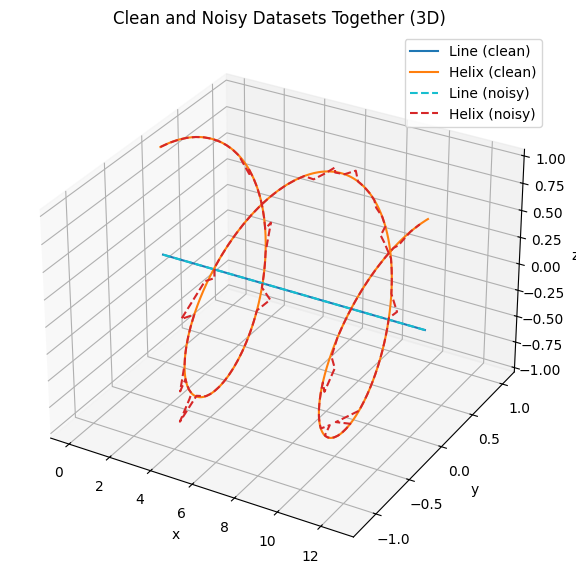

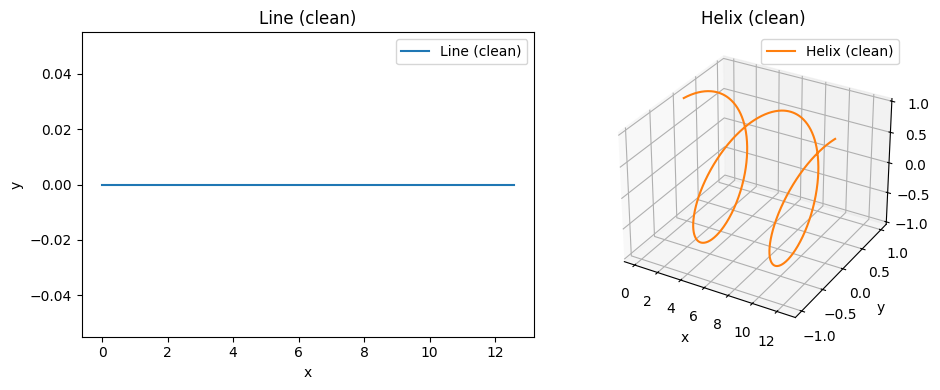

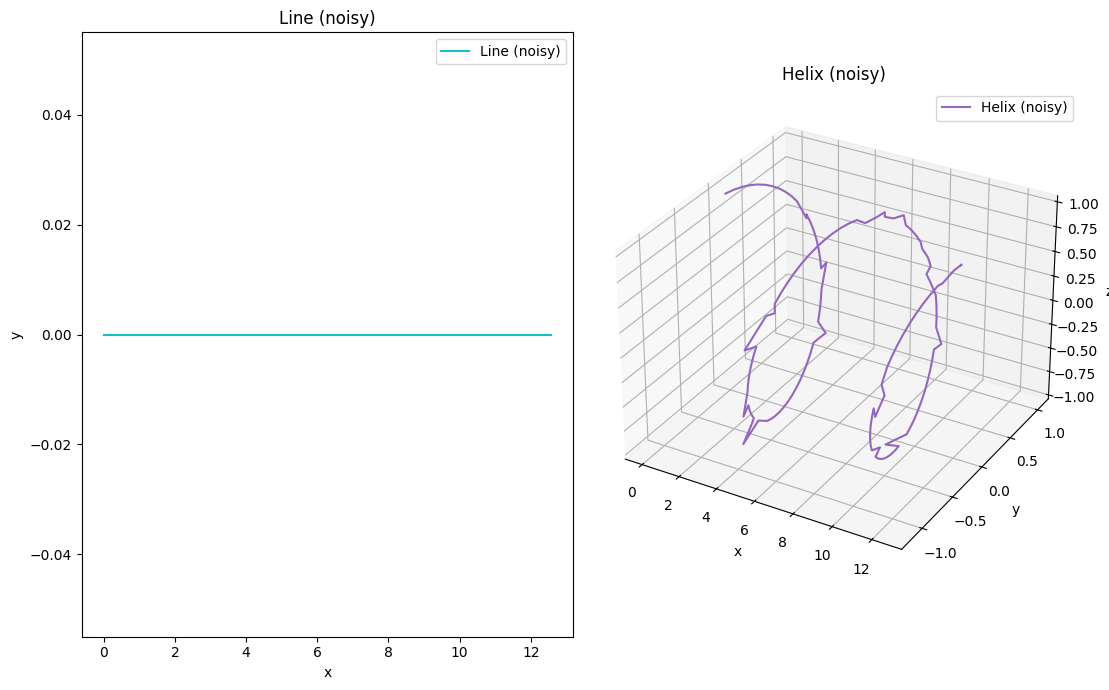

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot both clean and noisy datasets together in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(line['x'], line['y'], zs=0, zdir='z', label='Line (clean)', color='tab:blue')
ax.plot(helix['x'], helix['y'], helix['z'], label='Helix (clean)', color='tab:orange')
ax.plot(line_noisy['x'], line_noisy['y'], zs=0, zdir='z', label='Line (noisy)', linestyle='--', color='tab:cyan')
ax.plot(helix_noisy['x'], helix_noisy['y'], helix_noisy['z'], label='Helix (noisy)', linestyle='--', color='tab:red')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Clean and Noisy Datasets Together (3D)')
ax.legend()
plt.show()

# Plot clean datasets separately
fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
ax1.plot(line['x'], line['y'], label='Line (clean)', color='tab:blue')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Line (clean)')
ax1.legend()
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(helix['x'], helix['y'], helix['z'], label='Helix (clean)', color='tab:orange')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Helix (clean)')
ax2.legend()
plt.tight_layout()
plt.show()

# Plot noisy datasets separately
fig = plt.figure(figsize=(11, 7))
ax1 = fig.add_subplot(121)
ax1.plot(line_noisy['x'], line_noisy['y'], label='Line (noisy)', color='tab:cyan')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Line (noisy)')
ax1.legend()
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(helix_noisy['x'], helix_noisy['y'], helix_noisy['z'], label='Helix (noisy)', color='tab:purple')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Helix (noisy)')
ax2.legend()
plt.tight_layout()
plt.show()